# Imports

In [63]:
import pandas as pd
import numpy as np 
import requests

from io import BytesIO
from PIL import Image, ImageColor
import colorsys

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
sns.set_theme()

# Load Image

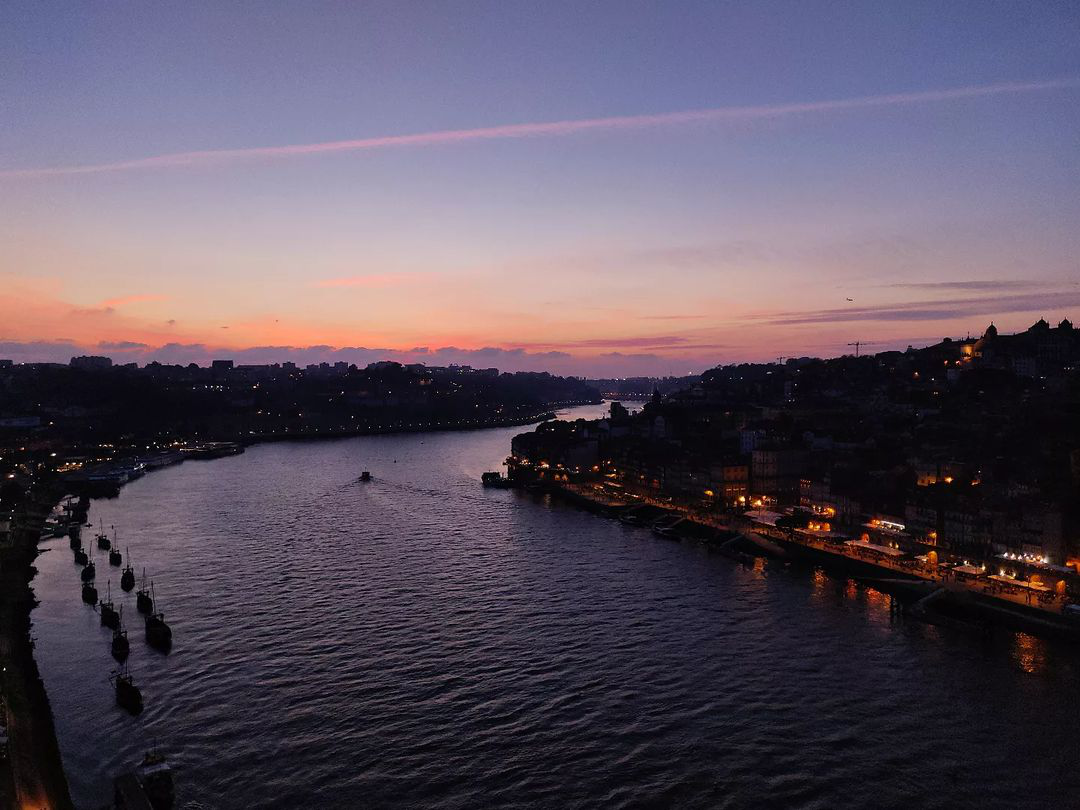

In [64]:
img = Image.open("image_samples/porto.jpg")
img

## Get RGB colors

In [65]:
# convert RGBA to RGB if necessary
n_dims = np.array(img).shape[-1]
n_dims # RGB -> has 3 channels

3

In [66]:
# Convert RGBA to RGB
if n_dims == 4:
    temp_img = Image.new("RGB", img.size, (255, 255, 255))
    temp_img.paste(img, mask=img.split()[3]) # 3 is the alpha channel
    img = temp_img

In [67]:
r,g,b = np.array(img).reshape(-1,n_dims).T

## Store RGB colors of all pixels to DataFrame

In [68]:
df_rgb = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=1000)

In [69]:
df_rgb

,R,G,B
793646,26,25,33
767785,18,17,25
134380,139,139,173
46125,101,105,153
299406,212,187,180
...,...,...,...
367932,188,123,117
856805,23,22,30
500946,10,8,13
41951,96,104,151


# Clustering

## Set Palette Size

Number of clusters is the palette size.

In [70]:
palette_size = 6

## Train KMeans Model

In [71]:
kmeans_model = KMeans(n_clusters=palette_size, 
                      random_state=0, 
                      init="k-means++",
                      n_init="auto").fit(df_rgb)

## Fetch Cluster Centers

The cluster centers are the palette colours in RGB Format

In [72]:
kmeans_model.cluster_centers_.astype(int).tolist()

[[134, 130, 164],
 [17, 14, 21],
 [198, 171, 171],
 [58, 49, 62],
 [107, 99, 131],
 [194, 126, 119]]

In [73]:
palette = kmeans_model.cluster_centers_.astype(int).tolist()

# Palette Visualization & Application

## Sort Palette

In [74]:
# palette.sort(key=lambda rgb: (lambda r, g, b : (r, g, b))(*rgb))
palette.sort(key=lambda rgb: (lambda r, g, b : colorsys.rgb_to_hsv(r, g, b))(*rgb))

In [75]:
palette

[[198, 171, 171],
 [194, 126, 119],
 [134, 130, 164],
 [107, 99, 131],
 [17, 14, 21],
 [58, 49, 62]]

## Visualize Palette

In [76]:
img_rgb = np.array([palette], dtype=np.uint8)
fig = px.imshow(img_rgb)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

## Use Palette in Seaborn

### Convert RGB to Hex Format

In [77]:
def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

In [78]:
list_hex = []

for each_rgb_col in palette:
    list_hex.append(rgb_to_hex(each_rgb_col[0], each_rgb_col[1], each_rgb_col[2]))
    
list_hex

['#c6abab', '#c27e77', '#8682a4', '#6b6383', '#110e15', '#3a313e']

### Set the Palette

In [79]:
sns.set_palette(list_hex)

In [80]:
sns.color_palette()

[(0.7764705882352941, 0.6705882352941176, 0.6705882352941176),
 (0.7607843137254902, 0.49411764705882355, 0.4666666666666667),
 (0.5254901960784314, 0.5098039215686274, 0.6431372549019608),
 (0.4196078431372549, 0.38823529411764707, 0.5137254901960784),
 (0.06666666666666667, 0.054901960784313725, 0.08235294117647059),
 (0.22745098039215686, 0.19215686274509805, 0.24313725490196078)]

### Example

In [81]:
a = list(range(0, 10))
b = np.random.rand(10)

<AxesSubplot:>

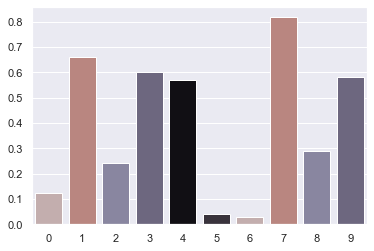

In [82]:
sns.barplot(x=a, 
            y=b,
            palette=sns.color_palette()
           )

## Use Palette in Plotly

In [83]:
df = px.data.gapminder().query("year == 2007")
fig = px.bar(df, y="continent", x="pop", color="continent", orientation="h", hover_name="country",
             color_discrete_sequence=list_hex, # use the list of hex here
             title="Explicit color sequence"
            )

fig.show()

## Use Palette in Matplotlib

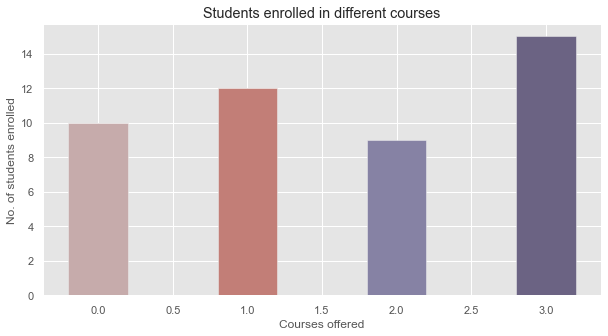

In [84]:

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar([0, 1, 2, 3], [10, 12, 9, 15], color = list_hex,
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

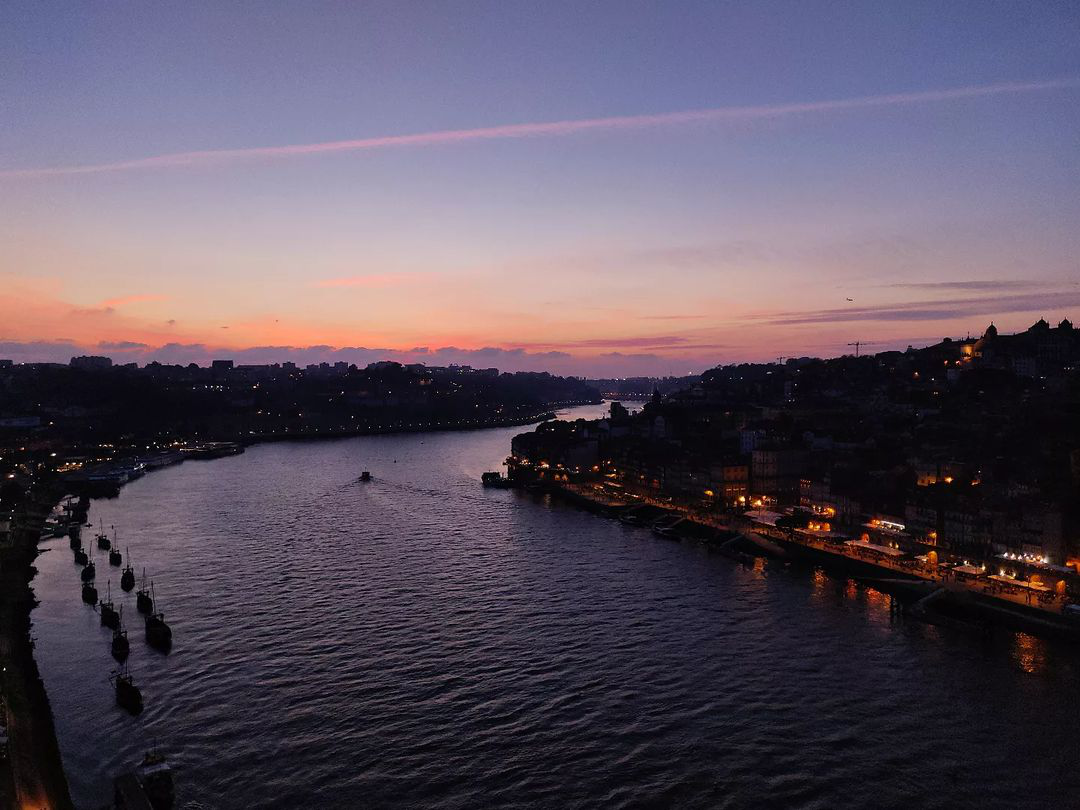

[(0.7764705882352941, 0.6705882352941176, 0.6705882352941176),
 (0.7607843137254902, 0.49411764705882355, 0.4666666666666667),
 (0.5254901960784314, 0.5098039215686274, 0.6431372549019608),
 (0.4196078431372549, 0.38823529411764707, 0.5137254901960784),
 (0.06666666666666667, 0.054901960784313725, 0.08235294117647059),
 (0.22745098039215686, 0.19215686274509805, 0.24313725490196078)]

In [85]:
display(img)
sns.color_palette(list_hex)

# Cluster Analysis

In [86]:
clusters = kmeans_model.predict(df_rgb)
df_rgb['n_cluster'] = clusters

In [87]:
df_rgb[df_rgb['n_cluster'] == 0].head()

,R,G,B,n_cluster
134380,139,139,173,0
98506,127,131,169,0
80009,122,123,167,0
93551,114,118,165,0
226446,164,152,176,0


In [88]:
df_rgb['hex_code'] = df_rgb.apply(lambda x: rgb_to_hex(x[0], x[1], x[2]), axis = 1)

In [89]:
for each_cluster in range(0, palette_size):
    print('Cluster ', each_cluster)
    display(sns.color_palette(list(df_rgb[df_rgb['n_cluster'] == each_cluster]['hex_code'][:10])))

Cluster  0


[(0.5450980392156862, 0.5450980392156862, 0.6784313725490196),
 (0.4980392156862745, 0.5137254901960784, 0.6627450980392157),
 (0.47843137254901963, 0.4823529411764706, 0.6549019607843137),
 (0.4470588235294118, 0.4627450980392157, 0.6470588235294118),
 (0.6431372549019608, 0.596078431372549, 0.6901960784313725),
 (0.5019607843137255, 0.5176470588235295, 0.6627450980392157),
 (0.5607843137254902, 0.4980392156862745, 0.5490196078431373),
 (0.611764705882353, 0.5568627450980392, 0.6235294117647059),
 (0.5843137254901961, 0.5686274509803921, 0.6666666666666666),
 (0.43529411764705883, 0.45098039215686275, 0.6352941176470588)]

Cluster  1


[(0.10196078431372549, 0.09803921568627451, 0.12941176470588237),
 (0.07058823529411765, 0.06666666666666667, 0.09803921568627451),
 (0.050980392156862744, 0.01568627450980392, 0.0196078431372549),
 (0.06666666666666667, 0.058823529411764705, 0.0784313725490196),
 (0.07450980392156863, 0.06666666666666667, 0.08627450980392157),
 (0.25098039215686274, 0.07058823529411765, 0.0784313725490196),
 (0.043137254901960784, 0.03529411764705882, 0.047058823529411764),
 (0.10980392156862745, 0.10196078431372549, 0.15294117647058825),
 (0.0392156862745098, 0.03529411764705882, 0.06666666666666667),
 (0.08235294117647059, 0.07450980392156863, 0.11764705882352941)]

Cluster  2


[(0.8313725490196079, 0.7333333333333333, 0.7058823529411765),
 (0.6941176470588235, 0.6588235294117647, 0.7254901960784313),
 (0.8862745098039215, 0.7372549019607844, 0.6627450980392157),
 (0.7686274509803922, 0.7215686274509804, 0.7686274509803922),
 (0.796078431372549, 0.6666666666666666, 0.6313725490196078),
 (0.8470588235294118, 0.7490196078431373, 0.7294117647058823),
 (0.8666666666666667, 0.6549019607843137, 0.5529411764705883),
 (0.6470588235294118, 0.6274509803921569, 0.7137254901960784),
 (0.803921568627451, 0.6392156862745098, 0.592156862745098),
 (0.7568627450980392, 0.7098039215686275, 0.7568627450980392)]

Cluster  3


[(0.3137254901960784, 0.2901960784313726, 0.33725490196078434),
 (0.25098039215686274, 0.2196078431372549, 0.2784313725490196),
 (0.25098039215686274, 0.20784313725490197, 0.2627450980392157),
 (0.2549019607843137, 0.21176470588235294, 0.26666666666666666),
 (0.21176470588235294, 0.2, 0.24313725490196078),
 (0.2549019607843137, 0.23921568627450981, 0.3058823529411765),
 (0.1607843137254902, 0.15294117647058825, 0.20784313725490197),
 (0.1843137254901961, 0.1803921568627451, 0.21176470588235294),
 (0.1411764705882353, 0.13725490196078433, 0.16862745098039217),
 (0.14901960784313725, 0.13725490196078433, 0.20392156862745098)]

Cluster  4


[(0.396078431372549, 0.4117647058823529, 0.6),
 (0.39215686274509803, 0.34509803921568627, 0.4235294117647059),
 (0.35294117647058826, 0.30980392156862746, 0.36470588235294116),
 (0.43137254901960786, 0.3843137254901961, 0.4627450980392157),
 (0.3411764705882353, 0.30980392156862746, 0.3686274509803922),
 (0.4392156862745098, 0.39215686274509803, 0.47058823529411764),
 (0.35294117647058826, 0.39215686274509803, 0.592156862745098),
 (0.45098039215686275, 0.403921568627451, 0.4823529411764706),
 (0.5490196078431373, 0.4666666666666667, 0.49411764705882355),
 (0.3843137254901961, 0.3137254901960784, 0.3764705882352941)]

Cluster  5


[(0.6901960784313725, 0.4627450980392157, 0.4588235294117647),
 (0.6627450980392157, 0.4196078431372549, 0.4392156862745098),
 (0.6862745098039216, 0.4392156862745098, 0.4745098039215686),
 (0.788235294117647, 0.4196078431372549, 0.4117647058823529),
 (0.6509803921568628, 0.4470588235294118, 0.5372549019607843),
 (0.7215686274509804, 0.5098039215686274, 0.47058823529411764),
 (0.7843137254901961, 0.5411764705882353, 0.4823529411764706),
 (0.6274509803921569, 0.4196078431372549, 0.49019607843137253),
 (0.8745098039215686, 0.5294117647058824, 0.45098039215686275),
 (0.7254901960784313, 0.47058823529411764, 0.4627450980392157)]

# Demo

In [90]:
def generate_palette(img, palette_size):
    n_dims = np.array(img).shape[-1]
    # Convert RGBA to RGB
    if n_dims == 4:
        background = Image.new("RGB", img.size, (255, 255, 255))
        background.paste(img, mask=img.split()[3])  # 3 is the alpha channel
        img = background
    r, g, b = np.array(img).reshape(-1, n_dims).T
    df = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=1000)
    kmeans_model = KMeans(n_clusters=palette_size,
                          random_state=0,
                          init="k-means++",
                          n_init="auto").fit(df)
    palette = kmeans_model.cluster_centers_.astype(int).tolist()
    palette.sort(key=lambda rgb: (lambda r, g, b: colorsys.rgb_to_hsv(r, g, b))(*rgb))
    list_hex = []
    for each_rgb_col in palette:
        list_hex.append(rgb_to_hex(each_rgb_col[0], each_rgb_col[1], each_rgb_col[2]))
    sns.set_palette(list_hex)
    return sns.color_palette()

In [91]:
img_link = input("Image Link:")

Image Link:https://www.abercrombiekent.co.uk/-/media/abercrombieandkent/images/page-header-images/europe/greece/santorini-and-mykonos/santorini--mykonos0002greecesantorinishutterstock114807193.jpg?w=1920&h=940


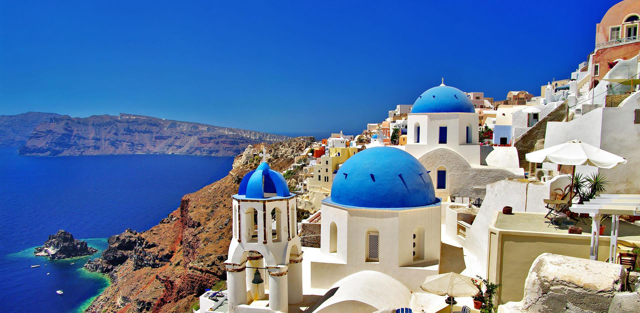

In [92]:
response = requests.get(img_link)
img = Image.open(BytesIO(response.content))
img.resize((round(img.size[0]/3), round(img.size[1]/3))) # resizing to fit here

In [93]:
generate_palette(img, 5)

[(0.27058823529411763, 0.2196078431372549, 0.1568627450980392),
 (0.615686274509804, 0.5294117647058824, 0.40784313725490196),
 (0.8666666666666667, 0.8431372549019608, 0.788235294117647),
 (0.1803921568627451, 0.47058823529411764, 0.7529411764705882),
 (0.07450980392156863, 0.3058823529411765, 0.7254901960784313)]